
Top 10 Important Features:
                                feature  importance
2                     num__totalcharges    0.152012
0                           num__tenure    0.141601
1                   num__monthlycharges    0.137075
37         cat__contract_Month-to-month    0.053648
19               cat__onlinesecurity_No    0.032442
44  cat__paymentmethod_Electronic check    0.027586
28                  cat__techsupport_No    0.026416
17     cat__internetservice_Fiber optic    0.023188
39               cat__contract_Two year    0.019649
22                 cat__onlinebackup_No    0.019282


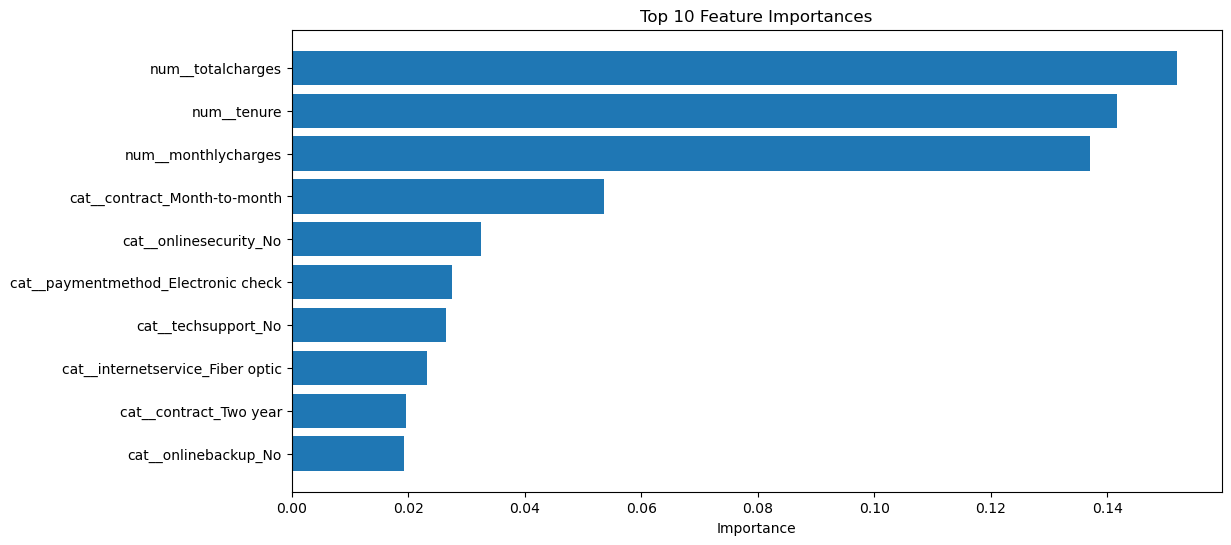

In [1]:
# Feature Selection using Tree-Based Model (Random Forest)

from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load train data again
train = pd.read_csv("data/train.csv")

# Separate features and target
X = train.drop(columns="churn")
y = train["churn"].map({"No": 0, "Yes": 1})  # Encode churn

# Identify numeric and categorical features
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing like before
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)

# Train Random Forest to get feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_preprocessed, y)

# Get feature names after OneHotEncoding
feature_names = preprocessor.get_feature_names_out()

# Feature importance
importances = rf.feature_importances_

# Create DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Display top important features
print("\nTop 10 Important Features:")
print(feature_importance_df.head(10))

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df.head(10)['feature'], feature_importance_df.head(10)['importance'])
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.show()

# Select top important features
top_features = feature_importance_df.head(10)['feature'].tolist()


Training and Evaluating on Selected Features: Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       826
           1       0.61      0.56      0.58       299

    accuracy                           0.79      1125
   macro avg       0.73      0.72      0.72      1125
weighted avg       0.78      0.79      0.79      1125



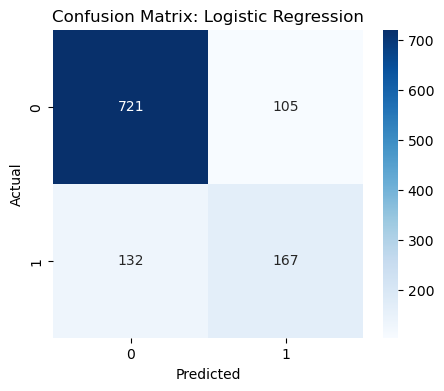

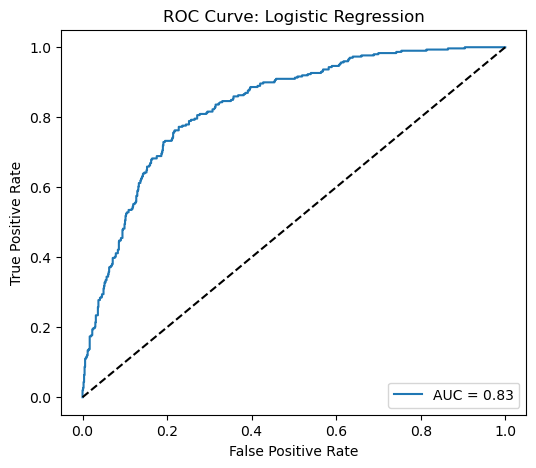

Training and Evaluating on Selected Features: KNN

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       826
           1       0.59      0.47      0.52       299

    accuracy                           0.77      1125
   macro avg       0.70      0.68      0.69      1125
weighted avg       0.76      0.77      0.76      1125



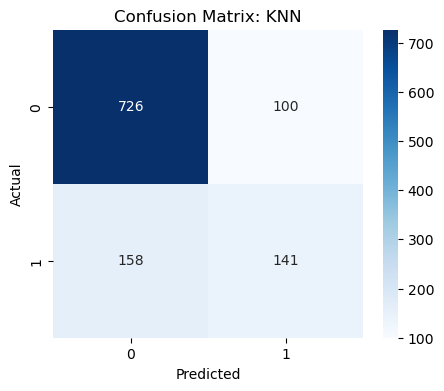

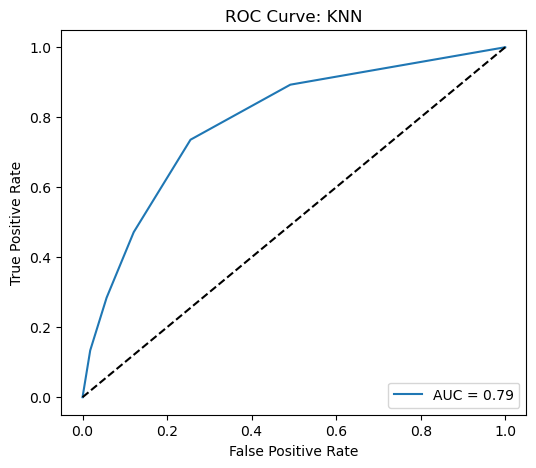

Training and Evaluating on Selected Features: SVM

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       826
           1       0.65      0.53      0.58       299

    accuracy                           0.80      1125
   macro avg       0.75      0.71      0.73      1125
weighted avg       0.79      0.80      0.79      1125



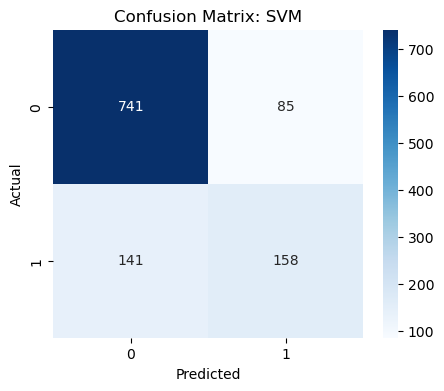

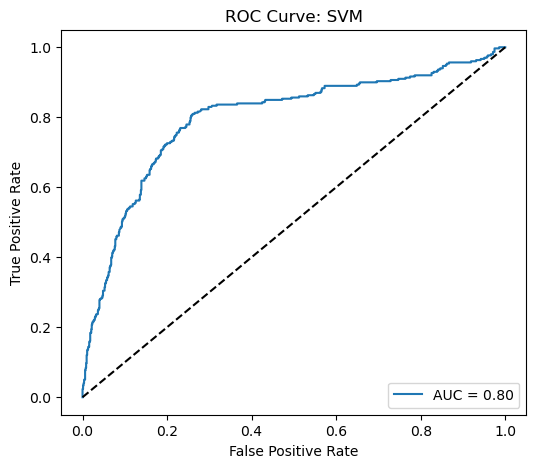

Training and Evaluating on Selected Features: Decision Tree

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       826
           1       0.47      0.52      0.49       299

    accuracy                           0.71      1125
   macro avg       0.64      0.65      0.65      1125
weighted avg       0.72      0.71      0.72      1125



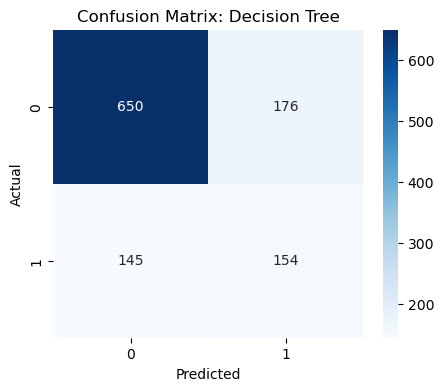

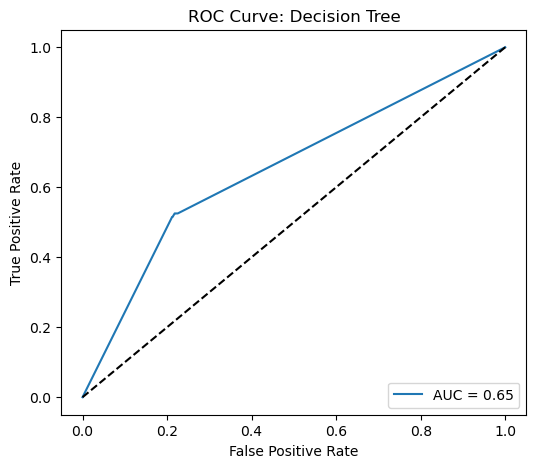

Training and Evaluating on Selected Features: Random Forest

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       826
           1       0.60      0.50      0.55       299

    accuracy                           0.78      1125
   macro avg       0.71      0.69      0.70      1125
weighted avg       0.77      0.78      0.77      1125



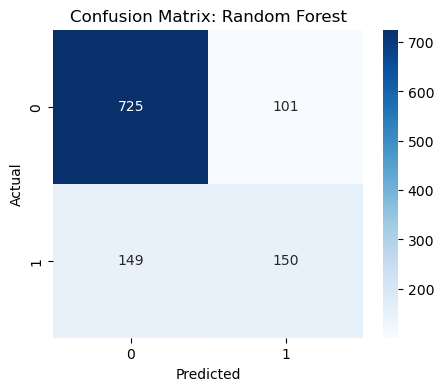

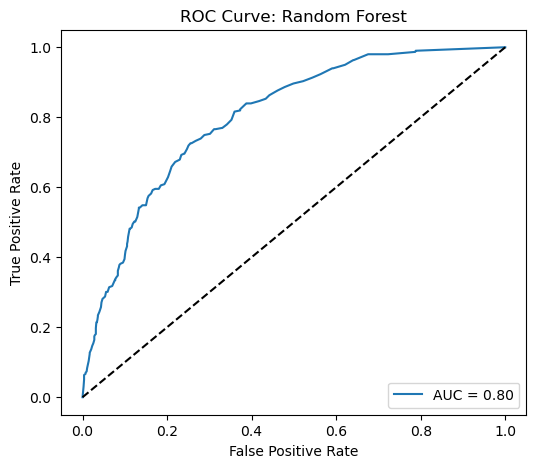

Training and Evaluating on Selected Features: XGBoost

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       826
           1       0.61      0.54      0.57       299

    accuracy                           0.78      1125
   macro avg       0.72      0.71      0.71      1125
weighted avg       0.78      0.78      0.78      1125



c:\Users\User\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:52:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


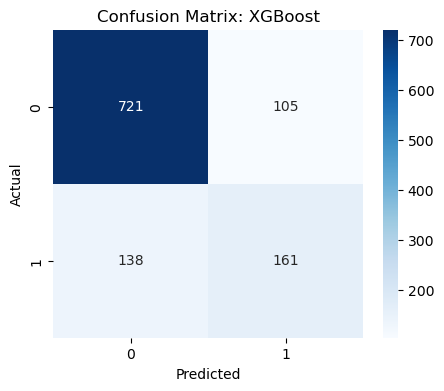

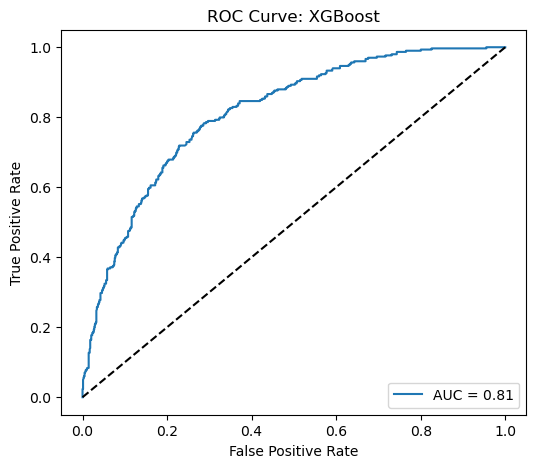

Training and Evaluating on Selected Features: LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1196, number of negative: 3304
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 597
[LightGBM] [Info] Number of data points in the train set: 4500, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       826
           1       0.61      0.52      0.56       299

    accuracy                           0.78      1125
   macro avg       0.72      0.70      0.71      1125
weighted avg       0.77      0.78      0.78      1125



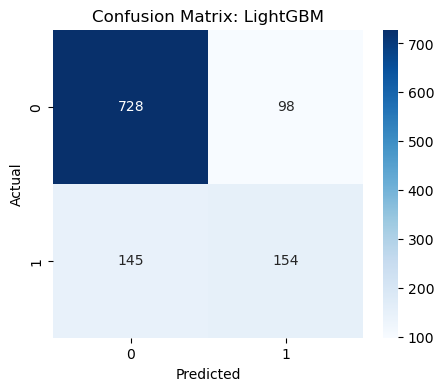

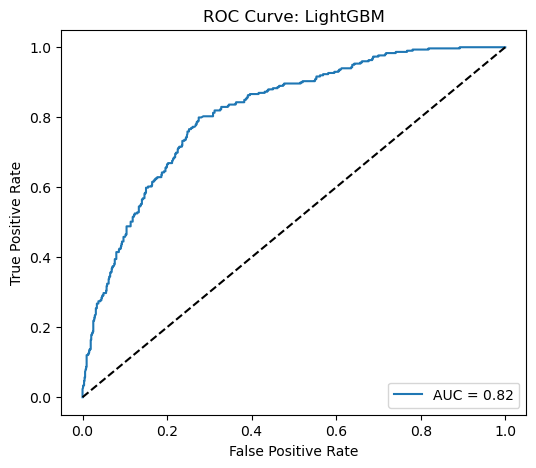


Model Evaluation Summary Table after Feature Selection:
                     Accuracy  Precision    Recall  F1-Score       AUC
Logistic Regression  0.789333   0.613971  0.558528  0.584939  0.833511
SVM                  0.799111   0.650206  0.528428  0.583026  0.798264
XGBoost              0.784000   0.605263  0.538462  0.569912  0.813059
LightGBM             0.784000   0.611111  0.515050  0.558984  0.816248
Random Forest        0.777778   0.597610  0.501672  0.545455  0.802497
KNN                  0.770667   0.585062  0.471572  0.522222  0.788208
Decision Tree        0.714667   0.466667  0.515050  0.489666  0.652348


In [2]:
# Task 4 Continued: Training with Selected Features + ROC Curve + Confusion Matrix

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load train.csv again
train = pd.read_csv("data/train.csv")

# Separate features and target
X = train.drop(columns="churn")
y = train["churn"].map({"No": 0, "Yes": 1})  # Encode churn

# Preprocessing
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

# Apply preprocessing to X
X_preprocessed = preprocessor.fit_transform(X)

# Get feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

# Convert preprocessed data to DataFrame
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=feature_names)
X_selected = X_preprocessed_df[top_features]

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Define models again
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:,1]  # probability estimates
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {model_name}')
    plt.legend(loc='lower right')
    plt.show()
    
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "AUC": roc_auc
    }

# Store results
selected_feature_results = {}

# Train and evaluate each model
for name, clf in models.items():
    print("="*60)
    print(f"Training and Evaluating on Selected Features: {name}")
    scores = evaluate_model(clf, X_train, X_val, y_train, y_val, name)
    selected_feature_results[name] = scores

# Convert results into a DataFrame
selected_results_df = pd.DataFrame(selected_feature_results).T
print("\nModel Evaluation Summary Table after Feature Selection:")
print(selected_results_df.sort_values(by="F1-Score", ascending=False))


📦 Feature Selection and Model Evaluation (Step-by-Step Explanation)

1. Loaded the training dataset again and separated features (X) and target (y).
2. Encoded the "churn" column into 0 (No) and 1 (Yes) for machine learning models.
3. Identified which features are numerical and which are categorical.

4. Built preprocessing pipelines:
   - For numerical features: filled missing values and scaled them.
   - For categorical features: filled missing values and one-hot encoded them.

5. Combined both pipelines into a full preprocessing transformer.

6. Applied preprocessing to the features and converted them into a clean DataFrame.

7. Used a Random Forest model to find the most important features from the processed data.
8. Selected the Top 10 important features based on feature importance scores.

9. Filtered the dataset to keep only these top features for training models.

10. Split the data into training and validation sets (80% train, 20% validation) using stratified sampling.

11. Defined multiple machine learning models:
    - Logistic Regression, KNN, SVM, Decision Tree, Random Forest, XGBoost, LightGBM.

12. Built a model evaluation function that:
    - Trains each model.
    - Prints the classification report.
    - Plots Confusion Matrix and ROC Curve for each model.
    - Calculates Accuracy, Precision, Recall, F1-Score, and AUC.

13. Trained and evaluated each model using the selected top features.

14. Stored all model results in a dictionary.

15. Converted the results into a DataFrame and sorted the models by F1-Score to find the best performer.

✅ This step helped to improve model performance by training on only the most important features.
